In [ ]:
'''
Exercício baseado em:
Livro: Introdução aos métodos estatísticos para economia e finanças
Capítulo 6: Intervalos de confiança e testes de hipóteses  
Exemplos 6.2 e 6.5: Avaliação de programa de governo 
Autores: Carvalho, Cajueiro e Camargo
Editora UnB

Em caso de dúvidas ou problemas, solicitamos, por gentileza, entrar em contato pelo e-mail:
python.economia@gmail.com
'''

In [ ]:
'''
Após dois anos de um programa de melhoria do ensino público, a secretaria da educação de um Estado brasileiro quer avaliar o 
aprendizado dos seus alunos do ensino médio. O programa será considerado bem-sucedido se a nota média dos alunos for superior 
a 0.7 em um exame padronizado.
Em vez de aplicar a prova a todos os alunos da rede pública, resolveu-se que apenas uma amostra aleatória de 100 alunos iriam
realizá-la.
Uma vez selecionada a amostra de 100 alunos, as provas são aplicadas. As notas obtidas (de 0 a 1) pelos alunos que prestaram a 
prova estão no arquivo "Arquivo 32.xlsx"
Essa amostra é utilizada para estimar qual seria a média populacional de notas para toda a população de alunos do ensino médio 
da rede pública daquele Estado.
Com isto:

a) Utilize a amostra para calcular a estimativa pontual da nota média populacional

b) Os pesquisadores sabem que a nota média obtida acima de 0.7 pode ser exclusivamente efeito da amostra coletada, ou seja, 
   pode ser efeito de uma seleção de alunos, em média, melhores do que os alunos em geral do ensino público e, portanto, essa  
   média amostral não estaria refletindo a realidade da população como um todo.
   Por isso, supuseram que as notas dos alunos nas provas têm distribuição normal e conduziram o teste de hipóteses abaixo. 

   Teste de Hipóteses
   H0: μ <= 0.7
   Ha: μ > 0.7    ---> teste unicaudal da cauda superior

   nivel de significância estabelecido: 5%
   μ: nota média da população de estudantes do ensino médio público 

   Verifique se eles puderam obter uma conclusão favorável ao programa de melhoria do ensino público.
   (Note que a conclusão será favorável ao programa se for possível rejeitar H0, o que levaria à conclusão de que μ > 0.7)
   
c) No item b, para realizar o teste de hipóteses, os pesquisadores supuseram que os dados populacionais das notas dos alunos nas
   provas têm distribuição normal. Isto é necessário?

'''

### Importação dos dados

In [1]:
import pandas as pd
import scipy.stats as stats

In [2]:
dados_amostrais = pd.read_excel('Arquivo 32.xlsx', index_col='Aluno')

In [3]:
dados_amostrais.head()

,Nota
Aluno,
1,0.770
2,0.731
3,0.581
4,0.770
5,0.864


In [4]:
n = dados_amostrais['Nota'].count()     # n: tamanho da amostra
n

100

### a) Utilize a amostra para calcular a estimativa pontual da nota média populacional

In [5]:
media_amostral = dados_amostrais['Nota'].mean()
media_amostral

0.7232299999999999

### b) Teste de hipóteses  
Verificar se o resultado do teste permite obter uma conclusão favorável ao programa de melhoria do ensino público implementado.

In [ ]:
'''
H0: μ <= 0.7
Ha: μ > 0.7    ---> teste unicaudal da cauda superior

nivel de significância estabelecido = 0.05
'''

In [6]:
hipotese_media_populacional = 0.7

teste_t = stats.ttest_1samp(dados_amostrais['Nota'], 
                            popmean=hipotese_media_populacional, 
                            alternative='greater' )                # greater: teste unicaudal da cauda superior

In [7]:
# Estatística de teste
teste_t.statistic

1.562624717722046

In [8]:
# valor-p
teste_t.pvalue

0.06066598910809665

In [ ]:
'''
----------------------------------------------------------------------
H0: μ <= 0.7
Ha: μ > 0.7    ---> teste unicaudal da cauda superior

nivel_significancia = 0.05
----------------------------------------------------------------------

Critério de decisão : valor p
Rejeitar H0 se (valor p <= nivel de significância)

Temos:
valor-p = 0.06
nivel de significancia estabelecido = 0.05
Portanto: valor-p > nivel de significância

Como (valor p > nivel de significância) não podemos rejeitar H0 a um nível de significância de 5%.


Como não podemos rejeitar H0, não podemos concluir que μ > 0.7. Ou seja, a amostra não fornece evidências fortes o suficiente 
para conclusão de que o programa de melhoria do ensino público foi bem-sucedido (mesmo que a nota média da amostra tenha sido 
maior do que 0.7).
'''

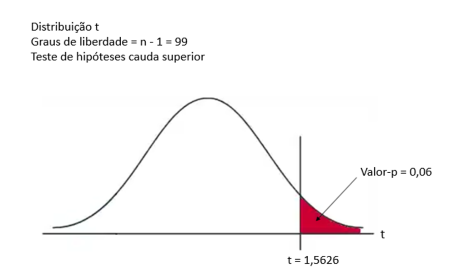

### c)   
### No item b, para realizar o teste de hipóteses, os pesquisadores supuseram que os dados populacionais das notas dos alunos nas provas têm distribuição normal. Isto é necessário?

In [ ]:
'''
Resposta sugerida (Não reflete necessariamente a visão dos autores do livro)

A suposição de que as notas dos alunos têm distribuição normal (para a população) assegura que a média amostral (para um dado 
tamanho da amostral) segue uma distribuição normal. Isto, por sua vez, assegura que a estatística de teste utilizada segue uma 
distribuição t-student com (n-1) graus de liberdade. Com isso, podemos aplicar o procedimento do  teste de hipóteses calculando
a estatística de teste e o valor-p correspondente para qualquer tamanho de amostra.

No entanto, neste caso, com n = 100, poderíamos argumentar que o tamanho da amostra é grande o suficiente para assumirmos que
a média amostral é aproximadamente normal, mesmo sem a normalidade dos dados populacionais da qual se extrai a amostra. Com 
isso, os resultados obtidos pela aplicação do método são aproximados.
Na maioria dos casos, quando n > 30, a aplicação do teste de hipóteses que fizemos produz bons resultado. Com dados 
populacionais com assimetria elevada ou muitos outliers, alguns autores recomendam n > 50 ou ainda n > 70.

Assim, com um tamanho de amostra igual a 100, poderíamos argumentar que o procedimento do teste de hipóteses que realizamos 
neste exerício produz bons resultados mesmo se as notas dos alunos (dados populacionais) não sigam uma distribuição normal.

'''